In [1]:
import torch
import datasets, networks, sampling
import matplotlib.pyplot as plt
from torch import nn

In [2]:
#HYPERPARAMETERS
num_epochs = 10

# TODO Select a optimizer. [ 'adam', 'adamw', 'rmsprop' ]
optimizer_option = 'adamw'

# TODO Select a lr scheduler. [ 'step', 'cosine', 'exponential']
lr_scheduler_option = ''

# TODO Select a batch size.
batch_size = 64

# TODO Select a learning rate.
lr = 1e-4


num_residual = 7
num_kernels = 96

In [3]:
ds = datasets.Dataset('mnist', batch_size=batch_size)
training_data = ds.get_train_data_loader()
test_data = ds.get_test_data_loader()

# ds.visualize_dataset(training_data)

Using device: cuda:0
Epoch:   1/ 10, Batch     1, Loss: 5.4732
Epoch:   1/ 10, Batch   101, Loss: 2.0990
Epoch:   1/ 10, Batch   201, Loss: 1.6991
Epoch:   1/ 10, Batch   301, Loss: 1.5363
Epoch:   1/ 10, Batch   401, Loss: 1.3952
Epoch:   1/ 10, Batch   501, Loss: 1.2898
Epoch:   1/ 10, Batch   601, Loss: 1.2159
Epoch:   1/ 10, Batch   701, Loss: 1.1611
Epoch:   1/ 10, Batch   801, Loss: 1.1198
Epoch:   1/ 10, Batch   901, Loss: 1.0867
-----------------------------------------
Epoch:   1 took 69.17s
epoch: 1 -> Loss: 1.07636917


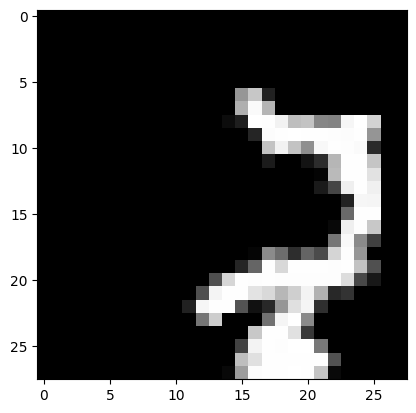

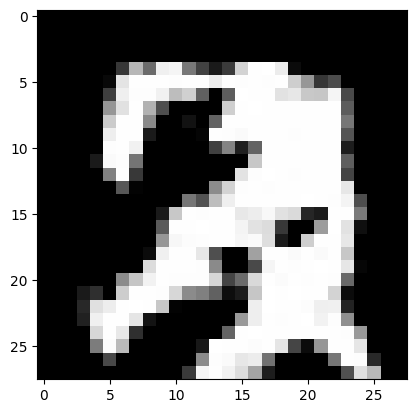

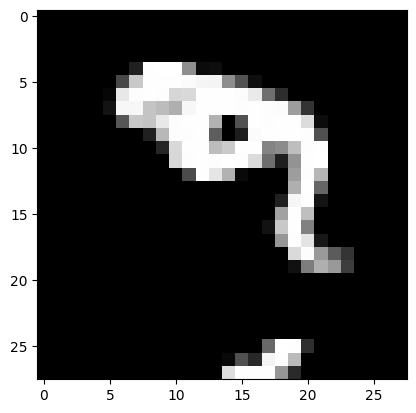

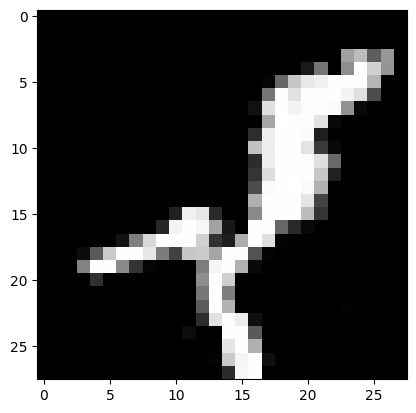

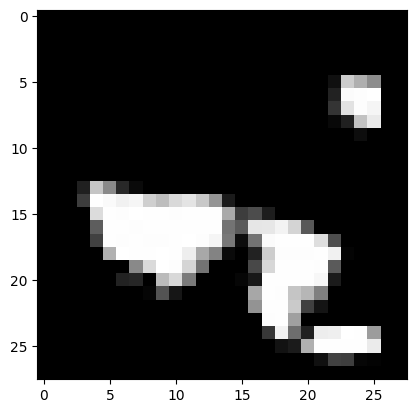

-----------------------------------------
Epoch:   2/ 10, Batch     1, Loss: 0.7929
Epoch:   2/ 10, Batch   101, Loss: 0.8182
Epoch:   2/ 10, Batch   201, Loss: 0.8191
Epoch:   2/ 10, Batch   301, Loss: 0.8167
Epoch:   2/ 10, Batch   401, Loss: 0.8150
Epoch:   2/ 10, Batch   501, Loss: 0.8141
Epoch:   2/ 10, Batch   601, Loss: 0.8133
Epoch:   2/ 10, Batch   701, Loss: 0.8122
Epoch:   2/ 10, Batch   801, Loss: 0.8111
Epoch:   2/ 10, Batch   901, Loss: 0.8101
-----------------------------------------
Epoch:   2 took 71.15s
epoch: 2 -> Loss: 0.80966580


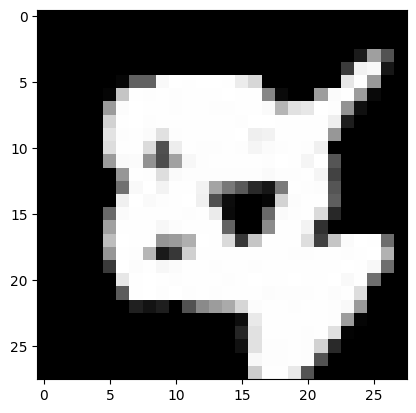

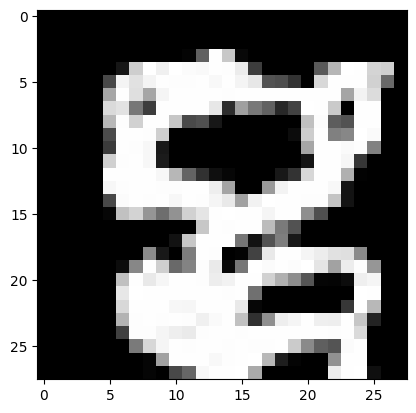

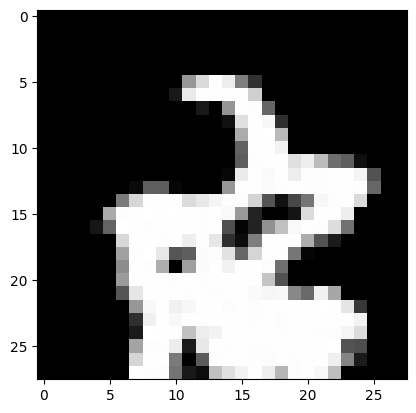

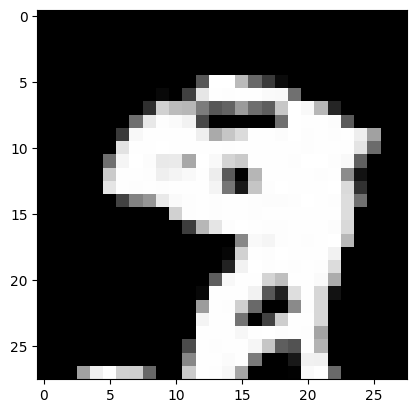

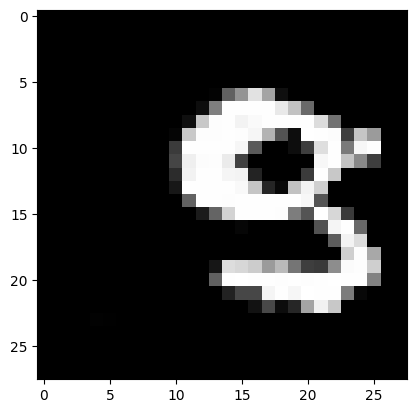

-----------------------------------------
Epoch:   3/ 10, Batch     1, Loss: 0.7494
Epoch:   3/ 10, Batch   101, Loss: 0.7992
Epoch:   3/ 10, Batch   201, Loss: 0.7983
Epoch:   3/ 10, Batch   301, Loss: 0.7988
Epoch:   3/ 10, Batch   401, Loss: 0.7988
Epoch:   3/ 10, Batch   501, Loss: 0.7981
Epoch:   3/ 10, Batch   601, Loss: 0.7983
Epoch:   3/ 10, Batch   701, Loss: 0.7979
Epoch:   3/ 10, Batch   801, Loss: 0.7968
Epoch:   3/ 10, Batch   901, Loss: 0.7971
-----------------------------------------
Epoch:   3 took 70.20s
epoch: 3 -> Loss: 0.79662597


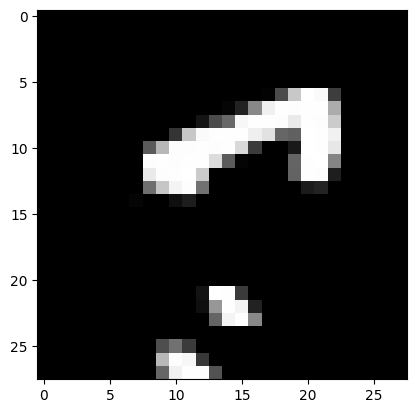

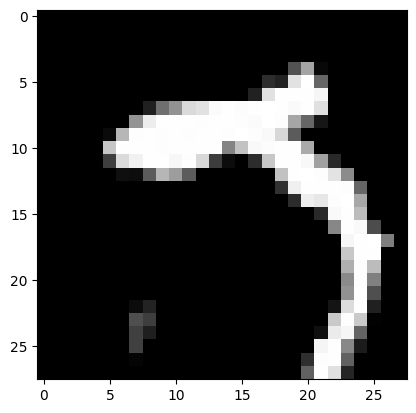

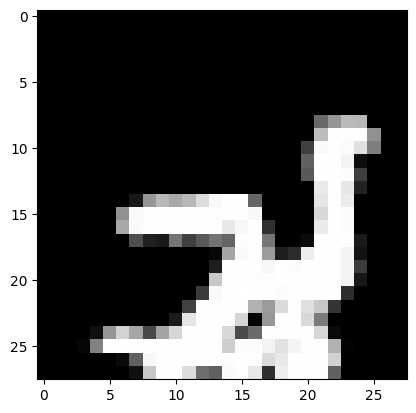

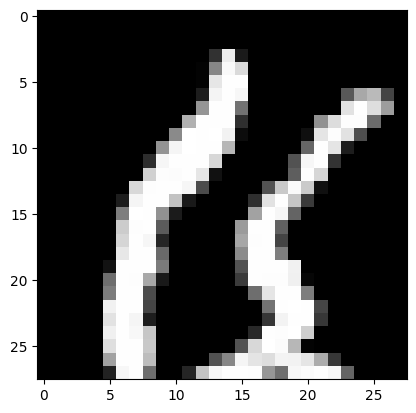

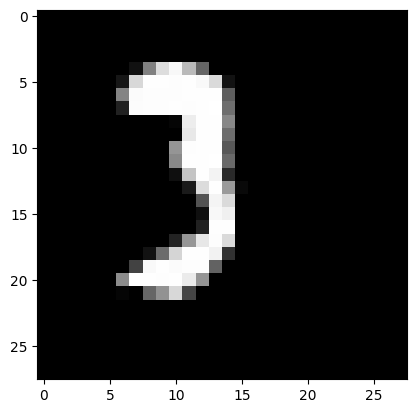

-----------------------------------------
Epoch:   4/ 10, Batch     1, Loss: 0.8289
Epoch:   4/ 10, Batch   101, Loss: 0.7936
Epoch:   4/ 10, Batch   201, Loss: 0.7912
Epoch:   4/ 10, Batch   301, Loss: 0.7908
Epoch:   4/ 10, Batch   401, Loss: 0.7918
Epoch:   4/ 10, Batch   501, Loss: 0.7913
Epoch:   4/ 10, Batch   601, Loss: 0.7906
Epoch:   4/ 10, Batch   701, Loss: 0.7906
Epoch:   4/ 10, Batch   801, Loss: 0.7901
Epoch:   4/ 10, Batch   901, Loss: 0.7899
-----------------------------------------
Epoch:   4 took 72.82s
epoch: 4 -> Loss: 0.78994852


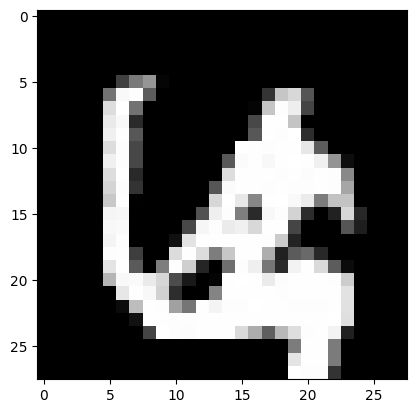

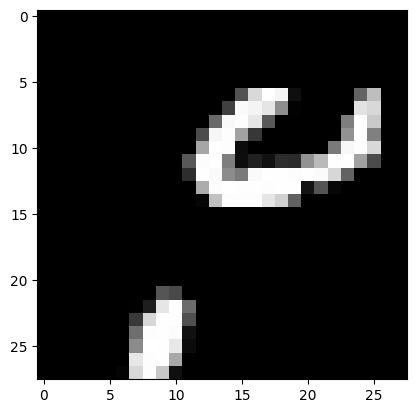

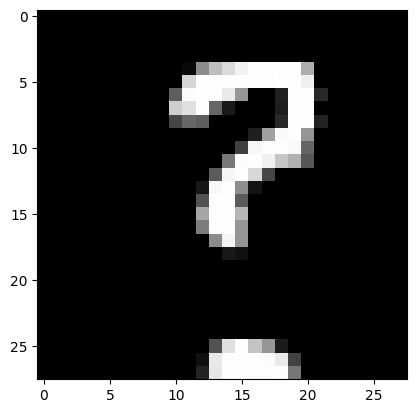

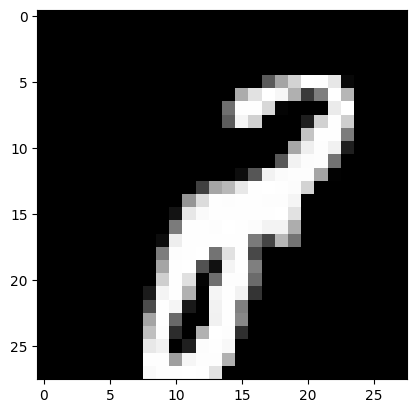

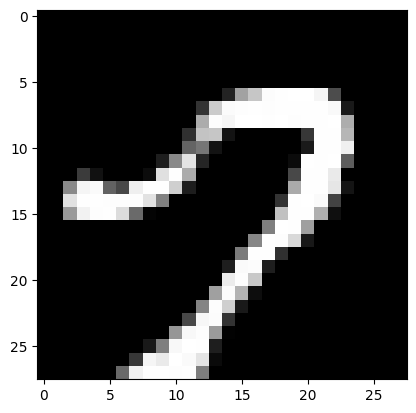

-----------------------------------------
Epoch:   5/ 10, Batch     1, Loss: 0.7800
Epoch:   5/ 10, Batch   101, Loss: 0.7831
Epoch:   5/ 10, Batch   201, Loss: 0.7853
Epoch:   5/ 10, Batch   301, Loss: 0.7867
Epoch:   5/ 10, Batch   401, Loss: 0.7872
Epoch:   5/ 10, Batch   501, Loss: 0.7871
Epoch:   5/ 10, Batch   601, Loss: 0.7868
Epoch:   5/ 10, Batch   701, Loss: 0.7867
Epoch:   5/ 10, Batch   801, Loss: 0.7864
Epoch:   5/ 10, Batch   901, Loss: 0.7862
-----------------------------------------
Epoch:   5 took 72.11s
epoch: 5 -> Loss: 0.78586990


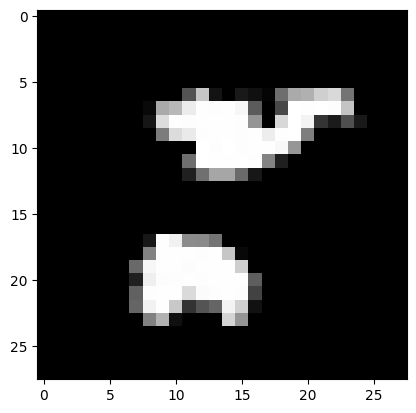

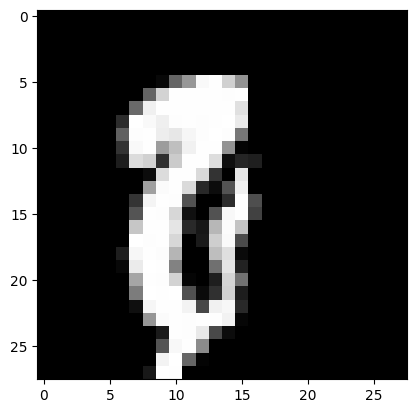

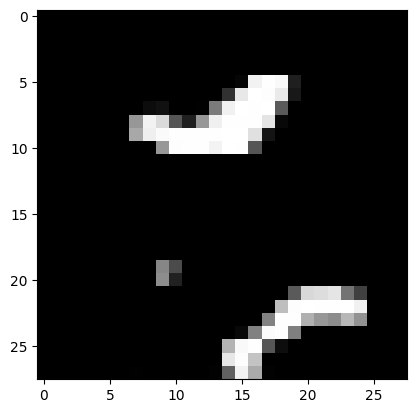

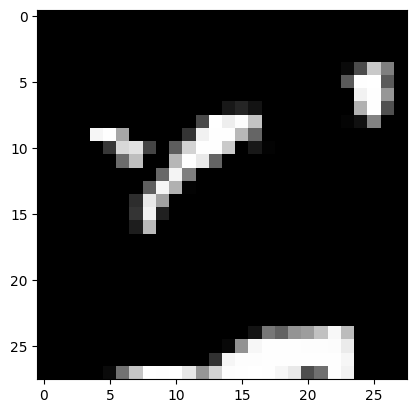

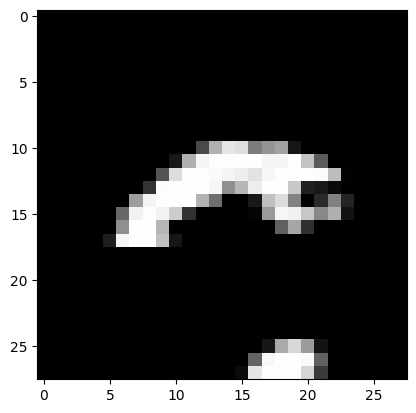

-----------------------------------------
Epoch:   6/ 10, Batch     1, Loss: 0.7339
Epoch:   6/ 10, Batch   101, Loss: 0.7792
Epoch:   6/ 10, Batch   201, Loss: 0.7801
Epoch:   6/ 10, Batch   301, Loss: 0.7799
Epoch:   6/ 10, Batch   401, Loss: 0.7798
Epoch:   6/ 10, Batch   501, Loss: 0.7822
Epoch:   6/ 10, Batch   601, Loss: 0.7825
Epoch:   6/ 10, Batch   701, Loss: 0.7820
Epoch:   6/ 10, Batch   801, Loss: 0.7819
Epoch:   6/ 10, Batch   901, Loss: 0.7815
-----------------------------------------
Epoch:   6 took 66.20s
epoch: 6 -> Loss: 0.78134507


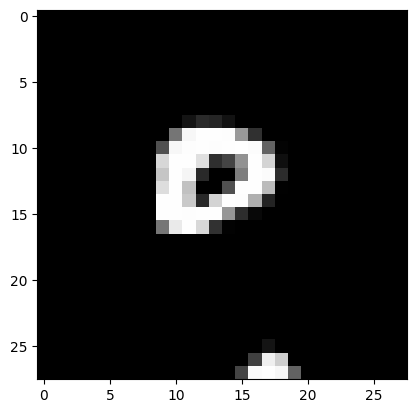

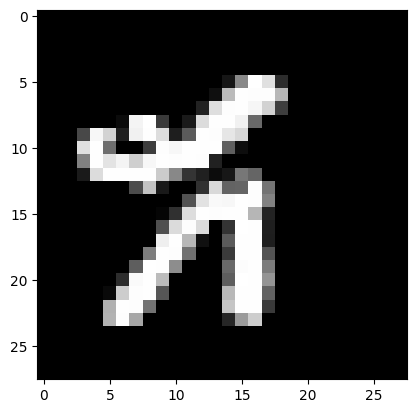

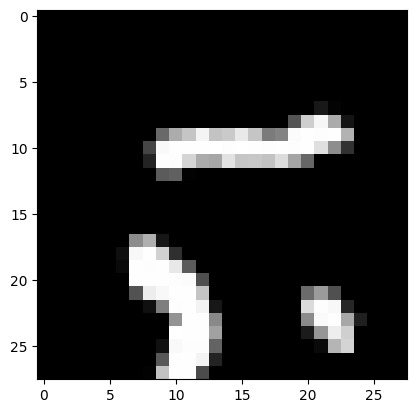

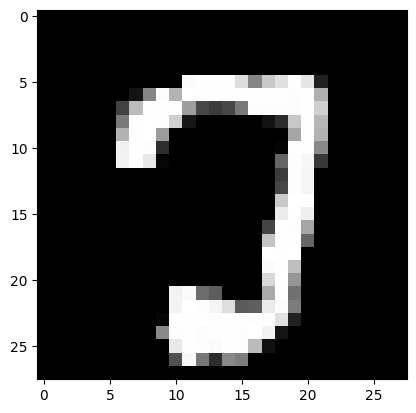

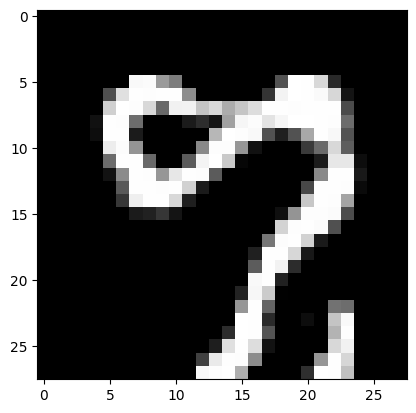

-----------------------------------------
Epoch:   7/ 10, Batch     1, Loss: 0.8327
Epoch:   7/ 10, Batch   101, Loss: 0.7822
Epoch:   7/ 10, Batch   201, Loss: 0.7792
Epoch:   7/ 10, Batch   301, Loss: 0.7783


KeyboardInterrupt: 

In [4]:
# Training for mnist
import time
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR
from torch.optim import Adam, AdamW, RMSprop, SGD 

PixelCNN = networks.PixelCNNv2(num_kernels=num_kernels)
# Select device
# if torch.cuda.is_available():
#   device = torch.device('cuda:0')
# else:
#   device = torch.device('cpu')
device = torch.device('cuda:0')
print(f'Using device: {device}')
print('=========================================')

PixelCNN.to(device)

total_loss = []
optimizer = None

# Select optimizer
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(PixelCNN.parameters(), lr)
  
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(PixelCNN.parameters(), lr)
  
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(PixelCNN.parameters(), lr)
  
else:
  optimizer = torch.optim.SGD(PixelCNN.parameters(), lr, momentum=0.9)  


#Select scheduler
# scheduler = None
# if lr_scheduler_option == 'step':
#     scheduler = StepLR(optimizer, step_size=2, gamma=0.9)
    
# elif lr_scheduler_option == 'exponential':
#     scheduler = ExponentialLR(optimizer, gamma=0.9)
    
# elif lr_scheduler_option == 'cosine':
#     scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=0.0001)

overall_start_time = time.time()

# training loop
for epoch in range(num_epochs):

  epoch_start_time = time.time()
  # Switch to training mode.
  PixelCNN.train()

  losses = []
  batch_idx = 0

  for images, labels in training_data:

    images = images.to(device).to(torch.float32)

    target = (images[:, 0, :, :]*255).long().to(device)

    optimizer.zero_grad()

    out = PixelCNN(images)

    loss = nn.functional.cross_entropy(out, target)

    loss.backward()
    optimizer.step()


    losses.append(loss.detach().clone())

    if batch_idx % 100 == 0:
      average_loss = torch.stack(losses).mean().item()
      print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
    batch_idx += 1

  # scheduler.step()
  epoch_end_time = time.time()
  print('-----------------------------------------')
  print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
  avg_loss_train = torch.stack(losses).mean().item()
  if epoch % 1 == 0:
    print(f"epoch: {epoch+1} -> Loss: {avg_loss_train:.8f}")
    sampling.samplingmnist(PixelCNN, device)
  print('-----------------------------------------')

  

overall_end_time = time.time()
print('=========================================')
print(f'Training took {overall_end_time - overall_start_time:.2f}s')


d:\GIT Repos\FPG1\PixelCNNnew\completion.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, dtype=torch.float32).view(1, img_chn, img_size, img_size).to(device)


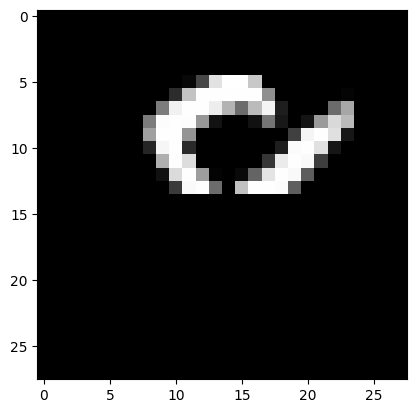

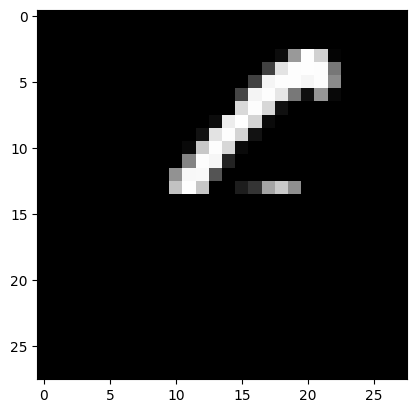

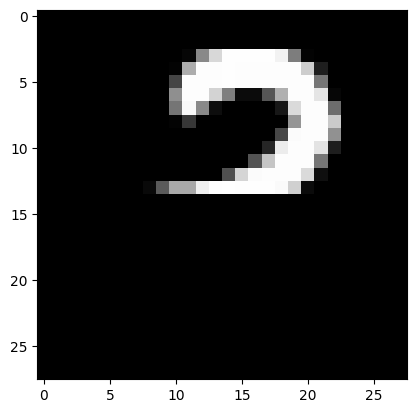

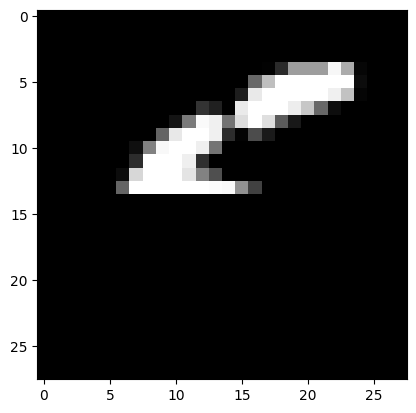

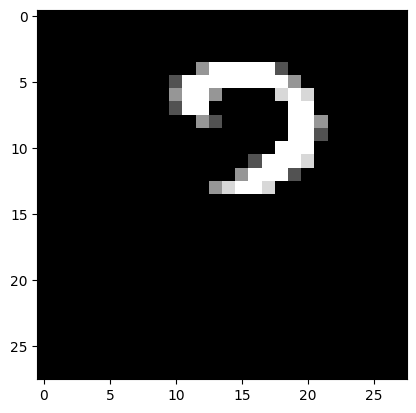

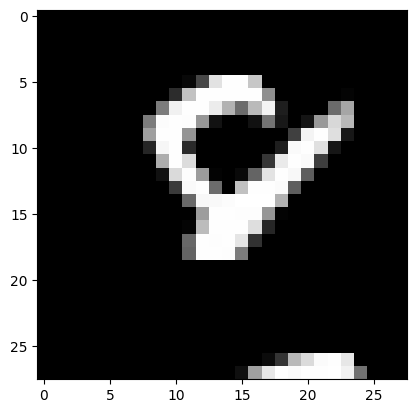

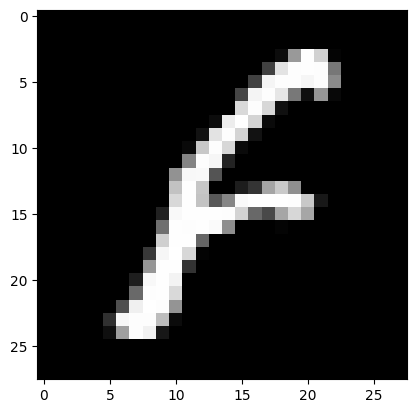

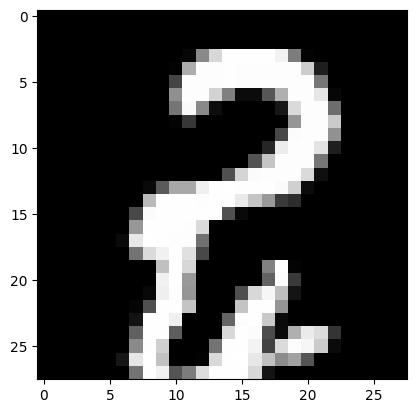

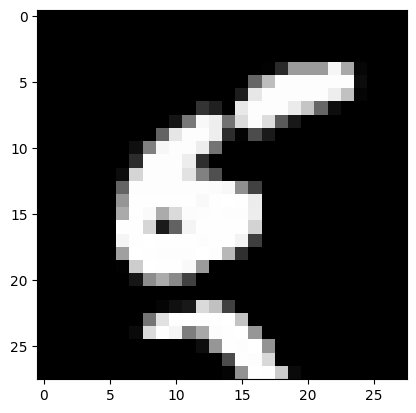

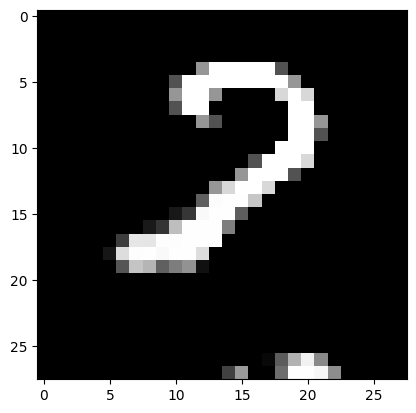

In [5]:
import completion

images = completion.get_random_image(ds, 5)
completion.completemnist(PixelCNN, device, images)